In [605]:
import numpy as np
import scipy.stats as stats

# Stacking arrays of different np.dtype

Many raster images are stored as unsigned integers. Many image analysis algorithms produce floating point values as output. There are use cases when it is necessary to produce an array that combines the original (integer) raster image data with the output (floating point) data. This is often called image stacking. This is fairly straight forward as long as the analyst remembers that the output image must be of a single data type (float) and that the original data must be cast as floating point values. 

This tutorial will work through an example where a small image (3 bands, 4 rows, 5 column) of synthetic data will be used as input into a Principal Components Analysis (PCA). The PCA produces 3 output arrays, one for each principal component. The first principal component is then "stacked" with the original data...the original data being cast as floating point values. 

* If you are only interested in the stacking part, then jump to the bottom (B. 

---

### A. Principal Components

##### 1. Suppose we have an image with 3 bands, 4 rows and 5 columns composed of unsigned 8-bit integer values...

In [606]:
raster = np.array([round(np.random.rand()*10) + x for x in np.arange(1, 61)]).reshape(3, 4, 5).astype(np.uint8)

In [607]:
raster

array([[[ 7, 12, 12, 13, 11],
        [ 7,  8, 11, 17, 18],
        [20, 12, 14, 17, 22],
        [25, 24, 23, 23, 29]],

       [[29, 24, 28, 32, 28],
        [26, 35, 29, 29, 37],
        [38, 38, 37, 36, 41],
        [41, 44, 39, 46, 44]],

       [[45, 50, 51, 49, 50],
        [55, 50, 51, 59, 52],
        [55, 53, 58, 54, 62],
        [62, 65, 63, 65, 65]]], dtype=uint8)

In [608]:
raster.shape

(3, 4, 5)

##### 2. Let's plot the data...to show that it is highly correlated.

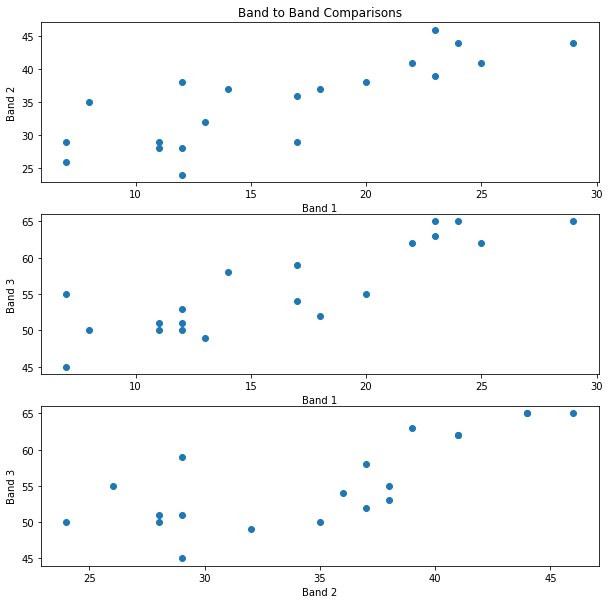

In [609]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
axs[0].set_title("Band to Band Comparisons")
axs[0].set_xlabel("Band 1")
axs[0].set_ylabel("Band 2")
axs[0].scatter(raster[0].reshape(-1), raster[1].reshape(-1))

axs[1].set_xlabel("Band 1")
axs[1].set_ylabel("Band 3")
axs[1].scatter(raster[0].reshape(-1), raster[2].reshape(-1))

axs[2].set_xlabel("Band 2")
axs[2].set_ylabel("Band 3")
axs[2].scatter(raster[1].reshape(-1), raster[2].reshape(-1))

In [610]:
corr = stats.pearsonr(raster[0].reshape(-1), raster[1].reshape(-1))
print("Pearson Correlation Coefficient: " + str(corr[0]) + ", p-value: " + str(corr[1]))

Pearson Correlation Coefficient: 0.814167495437, p-value: 1.25105927743e-05


##### See above...it's strongly correlated. When data is highly correlated it is redundant. Principal Components Analysis is a data reduction technique that captures most of the variation in a dataset.

##### 3. First, import the PCA module from Scikit-learn

In [611]:
from sklearn.decomposition import PCA

##### 4. Redimension the raster to the structure expected by Scikit-learn

In [612]:
sklearn_like = raster.reshape(raster.shape[0], raster.shape[1]*raster.shape[2]).T

In [613]:
sklearn_like

array([[ 7, 29, 45],
       [12, 24, 50],
       [12, 28, 51],
       [13, 32, 49],
       [11, 28, 50],
       [ 7, 26, 55],
       [ 8, 35, 50],
       [11, 29, 51],
       [17, 29, 59],
       [18, 37, 52],
       [20, 38, 55],
       [12, 38, 53],
       [14, 37, 58],
       [17, 36, 54],
       [22, 41, 62],
       [25, 41, 62],
       [24, 44, 65],
       [23, 39, 63],
       [23, 46, 65],
       [29, 44, 65]], dtype=uint8)

In [614]:
sklearn_like.shape

(20, 3)

##### 5. And perform the PCA, saving all 3 principal components...for now.

In [615]:
pca = PCA(n_components=3)

In [616]:
pca.fit(sklearn_like)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

* As you can see below, the first principal component explains most of the variation in the dataset.

In [617]:
pca.explained_variance_ratio_

array([ 0.8774334 ,  0.08030832,  0.04225828])

* Below we actually transform the original data to the new principal components, producing floating point values.

In [618]:
pc = pca.transform(raster.reshape(raster.shape[0], raster.shape[1]*raster.shape[2]).T)

In [619]:
pc

array([[ -1.49696881e+01,  -3.45333171e+00,  -7.98711237e-01],
       [ -1.20995355e+01,   4.57807362e+00,  -2.30162599e+00],
       [ -9.22872898e+00,   1.93280369e+00,  -9.74592914e-01],
       [ -7.42995825e+00,  -2.06985857e+00,  -2.29486513e+00],
       [ -1.03814159e+01,   1.12327280e+00,  -8.48210549e-01],
       [ -1.11438505e+01,   4.35422684e+00,   4.98099433e+00],
       [ -8.12033955e+00,  -5.25737873e+00,   2.64103285e+00],
       [ -9.24657879e+00,   8.68253419e-01,  -4.37792298e-02],
       [ -1.21809560e+00,   6.80890032e+00,   4.58388048e-01],
       [  1.14397516e-01,  -3.08941668e+00,  -3.31623549e+00],
       [  3.55460861e+00,  -1.72537429e+00,  -2.76456890e+00],
       [ -2.32980298e+00,  -4.95123655e+00,   2.02787442e+00],
       [  1.06545657e+00,  -9.10232204e-01,   3.49160130e+00],
       [  5.15961660e-02,  -1.47700497e+00,  -1.47336151e+00],
       [  1.03768554e+01,   2.12090921e-01,   6.56421795e-01],
       [  1.21663742e+01,   1.01549117e+00,  -1.6134175

In [620]:
pc.shape

(20, 3)

In [621]:
pc.dtype

dtype('float64')

##### 6. Restructure the floating point arrays to raster_like format.

In [622]:
raster_pc = pc1.T.reshape(raster.shape[0], raster.shape[1], raster.shape[2])

In [623]:
raster_pc

array([[[  1.65066418e+01,   1.53990720e+01,   1.18284992e+01,
           1.30442570e+01,   1.00881560e+01],
        [  6.11033664e+00,   6.07427398e+00,   4.90372963e+00,
           4.93979229e+00,   2.62104001e+00],
        [ -1.94891462e+00,  -2.53647450e+00,  -4.34894303e+00,
          -4.89586484e+00,  -1.06409392e+01],
        [ -1.18612725e+01,  -1.12330745e+01,  -1.17845718e+01,
          -1.58751545e+01,  -1.63905890e+01]],

       [[  6.22270894e-02,   2.21859217e+00,  -1.93483869e+00,
           1.49477533e-01,  -4.36007349e-01],
        [  1.77918454e+00,   3.65624106e-01,  -1.76033780e+00,
          -3.46777369e-01,  -1.00233157e+00],
        [  1.24128395e+00,   5.42104529e-01,  -7.86184999e-01,
          -7.99407049e-01,   4.58496274e-02],
        [ -1.31086354e+00,   7.42732631e-02,   7.88654274e-01,
          -5.09232082e-01,   1.61870936e+00]],

       [[ -7.17219643e-01,  -3.65966657e-01,  -3.61256243e-01,
          -7.82633474e-01,   2.03138041e+00],
        [  1.51

In [624]:
raster_pc.dtype

dtype('float64')

##### 7. Let's plot our principal components and see what we find.

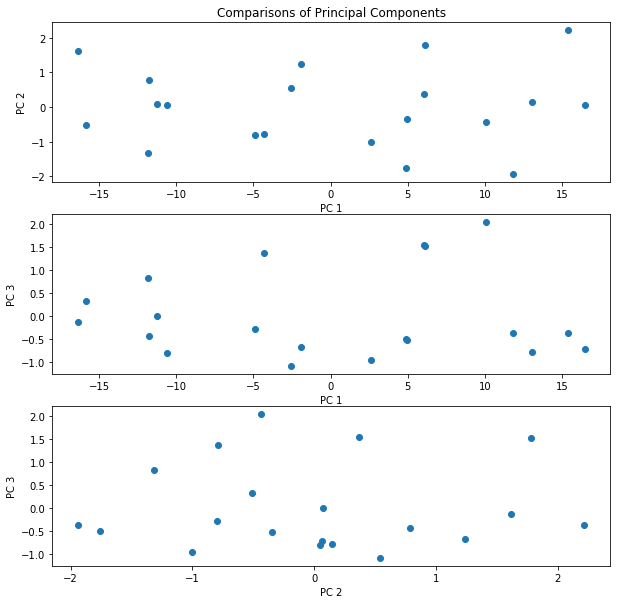

In [625]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
axs[0].set_title("Comparisons of Principal Components")
axs[0].set_xlabel("PC 1")
axs[0].set_ylabel("PC 2")
axs[0].scatter(raster_pc[0].reshape(-1), raster_pc[1].reshape(-1))

axs[1].set_xlabel("PC 1")
axs[1].set_ylabel("PC 3")
axs[1].scatter(raster_pc[0].reshape(-1), raster_pc[2].reshape(-1))

axs[2].set_xlabel("PC 2")
axs[2].set_ylabel("PC 3")
axs[2].scatter(raster_pc[1].reshape(-1), raster_pc[2].reshape(-1))

In [626]:
corr = stats.pearsonr(raster_pc[0].reshape(-1), raster_pc[1].reshape(-1))
print("Pearson Correlation Coefficient: " + str(corr[0]) + ", p-value: " + str(corr[1]))

Pearson Correlation Coefficient: 1.45057132439e-15, p-value: 1.0


##### The Pearson Correlation Coefficient above demonstrates that there is no relationship between the first 2 principal components, which is good...because there shouldn't be--they should be orthagonal.

##### 8. Below a plot and correlation coefficient is shown for image band #1 and principal component #1

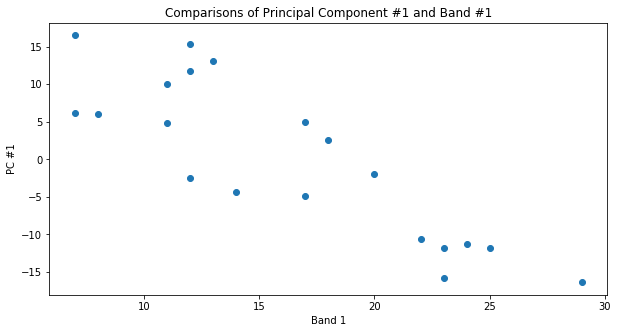

In [627]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.set_title("Comparisons of Principal Component #1 and Band #1")
axs.set_xlabel("Band 1")
axs.set_ylabel("PC #1")
axs.scatter(raster[0].reshape(-1), raster_pc[0].reshape(-1))

In [628]:
corr = stats.pearsonr(raster[0].reshape(-1), raster_pc[0].reshape(-1))
print("Pearson Correlation Coefficient: " + str(corr[0]) + ", p-value: " + str(corr[1]))

Pearson Correlation Coefficient: -0.856722923749, p-value: 1.41962962579e-06


##### The Pearson Correlation Coefficient above demonstrates that a strong relationship exists between principal component #1 and band #1. This is as expected--principal component #1 explains most of the variation in the image.

### B. Image Stacking

##### 9. Stack original image (with integer values) with principal component #1 (with floating point values) to produce a floating point image with 4 bands, 4 rows and 5 columns.

* The original image consists of unsigned 8-bit integers (uint8) and is of size \[3\]\[4\]\[5\]. The PCA image consists of 64-bit floating point values (float64) and is also of size \[3\]\[4\]\[5\]. We will stack all original bands with the 1st band of the PCA image.

In [629]:
raster.dtype

dtype('uint8')

In [630]:
raster.shape

(3, 4, 5)

In [631]:
raster_pc.dtype

dtype('float64')

In [632]:
raster_pc.shape

(3, 4, 5)

In [633]:
raster_stack = np.append(raster, raster_pc[0]).reshape(4, 4, 5)

In [634]:
raster_stack

array([[[  7.        ,  12.        ,  12.        ,  13.        ,  11.        ],
        [  7.        ,   8.        ,  11.        ,  17.        ,  18.        ],
        [ 20.        ,  12.        ,  14.        ,  17.        ,  22.        ],
        [ 25.        ,  24.        ,  23.        ,  23.        ,  29.        ]],

       [[ 29.        ,  24.        ,  28.        ,  32.        ,  28.        ],
        [ 26.        ,  35.        ,  29.        ,  29.        ,  37.        ],
        [ 38.        ,  38.        ,  37.        ,  36.        ,  41.        ],
        [ 41.        ,  44.        ,  39.        ,  46.        ,  44.        ]],

       [[ 45.        ,  50.        ,  51.        ,  49.        ,  50.        ],
        [ 55.        ,  50.        ,  51.        ,  59.        ,  52.        ],
        [ 55.        ,  53.        ,  58.        ,  54.        ,  62.        ],
        [ 62.        ,  65.        ,  63.        ,  65.        ,  65.        ]],

       [[ 16.50664181,  15.3990719

In [635]:
raster_stack.shape

(4, 4, 5)

In [636]:
raster_stack.dtype

dtype('float64')

##### 10. Once we have the stacked image it is often desirable to save the image to disk. We will use Rasterio for this.

In [637]:
import rasterio
from affine import Affine

In [638]:
transform = Affine.scale(30, 30)

In [639]:
meta = {"driver": "GTiff", "width": 5, "height": 4, "count": 4, "dtype": "float64", "transform": transform}

In [640]:
meta

{'count': 4,
 'driver': 'GTiff',
 'dtype': 'float64',
 'height': 4,
 'transform': Affine(30, 0.0, 0.0,
       0.0, 30, 0.0),
 'width': 5}

In [641]:
with rasterio.open("stacked.tif", "w", **meta) as dst:
    dst.write(raster_stack)
    dst.close()

##### 11. To check if it was written successfully, let's read the image (again, using Rasterio) and display it. 

In [642]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

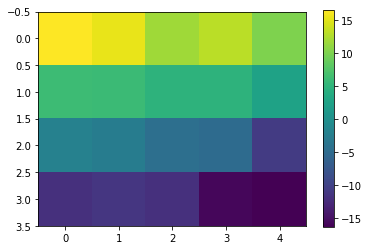

In [644]:
with rasterio.open("stacked.tif") as src:
    plt.imshow(src.read(4))
    plt.colorbar()

## Success! 